<a href="https://colab.research.google.com/github/Yash-11want/Image-super-resolution/blob/main/img_resulotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

Image Shape: 312 312
Original Image:


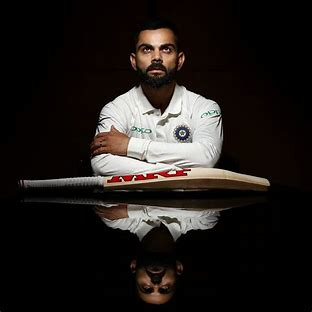

In [12]:
import numpy as np


# Read the original image and know its type
img1 = cv2.imread('/content/drive/MyDrive/img_for_SR/OIP.jpeg')

# Obtain the size of the original image
m= img1.shape[0]
n= img1.shape[1]
print('Image Shape:', m, n)

# Show original image
print('Original Image:')
cv2_imshow(img1)


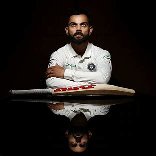

In [13]:
# Down sampling

# Assign a down sampling rate
# Here we are down sampling the
# image by 4
f = 2# Create a matrix of all zeros for
# downsampled values, with the correct dimensions and data type
img2 = np.zeros((m//f, n//f, 3), dtype=np.uint8)  # Assuming img1 is a color image (3 channels)

# Assign the down sampled values from the original
# image according to the down sampling frequency.
# For example, if the down sampling rate f=2, take
# pixel values from alternate rows and columns
# and assign them in the matrix created above
for i in range(0, m, f):
    for j in range(0, n, f):
        try:
            # Assign the RGB values directly
            img2[i//f][j//f] = img1[i][j]
        except IndexError:
            pass

# Ensure cv2_imshow is used for display
cv2_imshow(img2)  # Display the downsampled image

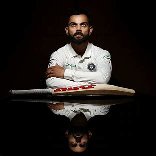

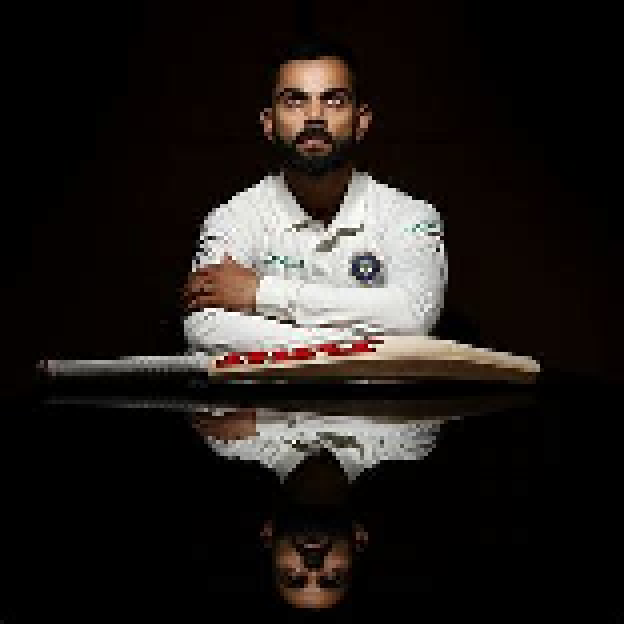

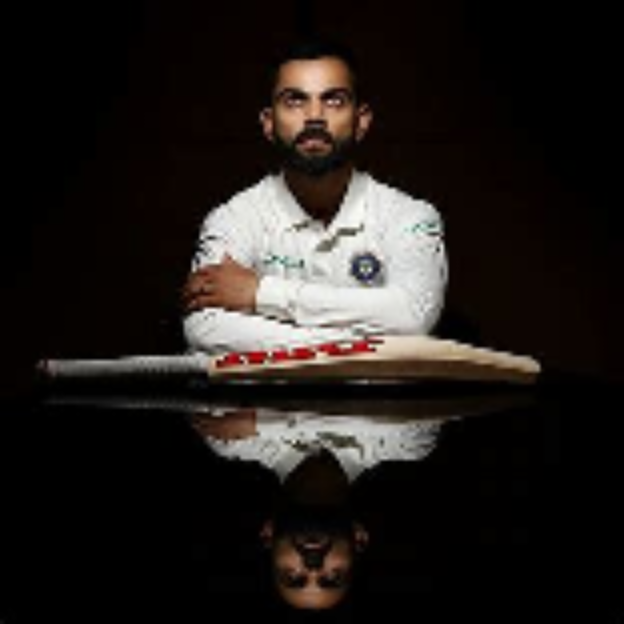

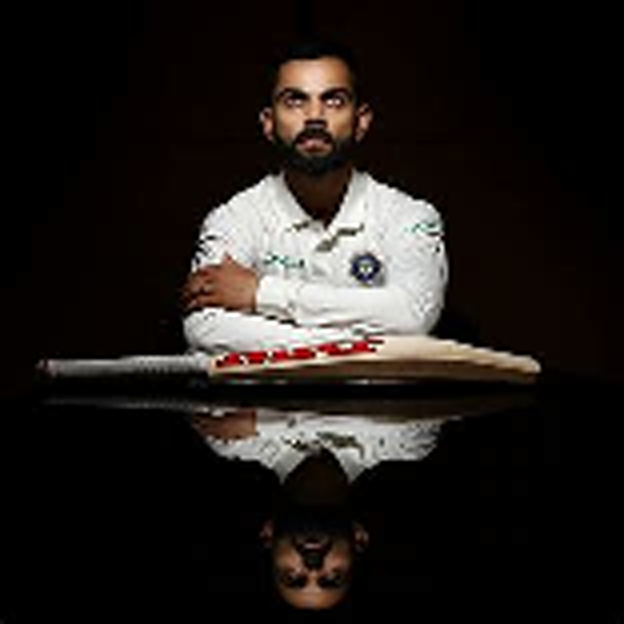

In [14]:
import numpy as np

new_width = img2.shape[1] * 4
new_height = img2.shape[0] * 4

# Resize using Nearest Neighbor Interpolation
img_NN = cv2.resize(img2, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

# Resize using Bilinear Interpolation
img_LINEAR = cv2.resize(img2, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Resize using Bicubic Interpolation
img_CUBIC = cv2.resize(img2, (new_width, new_height), interpolation=cv2.INTER_CUBIC)



cv2_imshow(img2)
print(" ") # Change: Convert to uint8
cv2_imshow(img_NN)
print(" ")
cv2_imshow(img_LINEAR)
print(" ")
cv2_imshow(img_CUBIC)



Input image size: torch.Size([3, 156, 156])
unsqueeze Image size torch.Size([1, 3, 156, 156])
Kernel Size : torch.Size([3, 3, 2, 2])
Output image size: torch.Size([3, 310, 310])


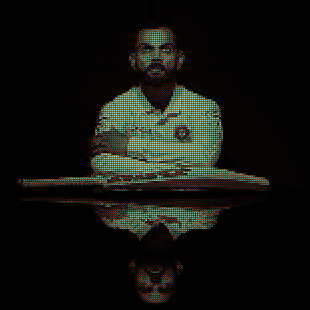

In [15]:
# Import the necessary module
from PIL import Image
import torch
from torch import nn
from torchvision import transforms

# Read input image


# convert the input image to torch tensor
img3 = transforms.ToTensor()(img2)
print("Input image size:", img3.size())

# unsqueeze the image to make it 4D tensor
img3 = img3.unsqueeze(0)
print('unsqueeze Image size',img3.shape)

#Kernel
Kernel = torch.tensor([
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
])

# Kernel shape
print('Kernel Size :',Kernel.shape)


# Transpose convolution Layer
Transpose = nn.ConvTranspose2d(in_channels =3,
                               out_channels =2,
                               kernel_size=2,
                               stride = 2,
                               padding=1,
                               bias=False)

# Initialize Kernel
Transpose.weight.data = Kernel

# Output value
img4 = Transpose(img3)

# squeeze image to make it 3D
img4 = img4.squeeze(0)
print("Output image size:",img4.size())

# convert image to PIL image
img4 = transforms.ToPILImage()(img4)

# display the image after convolution
img4

Input image size: torch.Size([3, 156, 156])
unsqueeze Image size torch.Size([1, 3, 156, 156])
Kernel Size : torch.Size([2, 3, 2, 2])
Output image size: torch.Size([3, 312, 312])


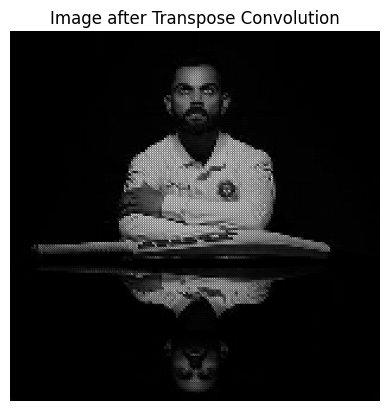

In [33]:
# Import the necessary module
from PIL import Image
import torch
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt # Import matplotlib for displaying images
import numpy as np # Import numpy if needed for displaying with matplotlib

# Read input image (using the previously downsampled image img2)

# convert the input image to torch tensor
img3 = transforms.ToTensor()(img2)
print("Input image size:", img3.size())

# unsqueeze the image to make it 4D tensor (batch_size, channels, height, width)
img3 = img3.unsqueeze(0)
print('unsqueeze Image size',img3.shape)

#Kernel (Example Kernel - note that this is a simple example and not a typical SR kernel)
# For transpose convolution, the kernel shape is (in_channels, out_channels, kernel_height, kernel_width)
# Or (out_channels, in_channels/groups, kernel_height, kernel_width) - check PyTorch docs for exact definition
# This example kernel seems to have an unusual shape for standard transpose convolution.
# Let's adjust the kernel definition based on typical transpose convolution usage.
# Assuming in_channels=3, out_channels=2, kernel_size=2
# The kernel shape should be (in_channels, out_channels, kernel_size[0], kernel_size[1])
# Let's redefine a simple kernel with the correct shape (3, 2, 2, 2)
Kernel = torch.tensor([
    # Output channel 1
    [[[1.0, 0.5], [0.3, 0.8]],  # Kernel for input channel 1 -> output channel 1
     [[0.2, 0.7], [0.9, 0.4]],  # Kernel for input channel 2 -> output channel 1
     [[0.6, 0.1], [0.0, 0.5]]], # Kernel for input channel 3 -> output channel 1

    # Output channel 2
    [[[0.4, 0.9], [0.1, 0.6]],  # Kernel for input channel 1 -> output channel 2
     [[0.8, 0.3], [0.5, 0.0]],  # Kernel for input channel 2 -> output channel 2
     [[0.7, 0.2], [0.4, 0.9]]]  # Kernel for input channel 3 -> output channel 2
])


# Kernel shape
print('Kernel Size :',Kernel.shape)

# Transpose convolution Layer
# We want to increase the spatial dimensions (height and width)
# stride=2 with kernel_size=2 will typically double the height and width.
# padding=1 might be used depending on the desired output size relative to the input size.
# The formula for output size with TransposeConv2d is:
# output_size = (input_size - 1) * stride - 2 * padding + dilation * (kernel_size - 1) + output_padding + 1
# For input size H, W and kernel_size k, stride s, padding p:
# output_height = (H - 1)*s - 2*p + k + output_padding
# output_width = (W - 1)*s - 2*p + k + output_padding
# With input_size (m//f, n//f), kernel_size=2, stride=2, padding=1:
# output_height = (m//f - 1)*2 - 2*1 + 2 + output_padding = 2*(m//f) - 2 - 2 + 2 + output_padding = 2*(m//f) - 2 + output_padding
# output_width = (n//f - 1)*2 - 2*1 + 2 + output_padding = 2*(n//f) - 2 - 2 + 2 + output_padding = 2*(n//f) - 2 + output_padding
# If we want to achieve 2*(m//f) and 2*(n//f), we need output_padding=2.
# However, this seems like an unusual setup for a simple SR example.
# A common approach in simple examples or sub-pixel convolution is to use stride=2, kernel_size=2, and padding=0, which results in output size 2*input_size.
# Let's adjust the padding and potentially the output channels to fit a more standard SR context or just demonstrate the layer.
# If the goal is to get a color image output, out_channels should be 3.
# Let's assume we want to upsample the image by 2x and get a 3-channel output.
# A kernel of shape (in_channels, (scale_factor^2)*out_channels, kernel_height, kernel_width) is often used before a PixelShuffle layer in SR.
# But since a simple TransposeConv2d is used here, let's try to make it upsample by 2x with 3 output channels.
# To get output height/width roughly 2x of input with stride=2, kernel_size=2, padding=0:
# output_height = (m//f - 1)*2 - 0 + 2 + output_padding = 2*(m//f) - 2 + 2 + output_padding = 2*(m//f) + output_padding
# If output_padding=0, output_size is 2*(m//f). If output_padding=1, output_size is 2*(m//f)+1.
# Let's use stride=2, kernel_size=2, padding=0, and output_padding=0 for a clean 2x upsampling.
# If the input is (H, W), the output will be (2*H, 2*W).

# Redefine TransposeConv2d for 2x upsampling and 3 output channels
Transpose = nn.ConvTranspose2d(in_channels =3,
                               out_channels =3, # Assuming we want a color image output
                               kernel_size=2,
                               stride = 2,
                               padding=0, # Adjust padding for standard 2x upsampling
                               output_padding=0, # Adjust output_padding
                               bias=False)

# Initialize Kernel - need a kernel with shape (in_channels, out_channels, kernel_size, kernel_size) -> (3, 3, 2, 2)
# This example kernel seems to have shape (3, 3, 2, 2) which matches the layer definition.
# Let's keep the original user-provided kernel shape but ensure it's assigned correctly.
# The user's kernel shape was (3, 3, 2, 2) which fits (out_channels, in_channels/groups, kH, kW) if groups=1.
# However, the TransposeConv2d weight shape is (in_channels, out_channels/groups, kH, kW).
# So the user's kernel definition seems to be for a standard convolution, or it needs transposing.
# Let's assume the user intended to define weights matching the layer's expected shape (3, 3, 2, 2).
# The original kernel definition was torch.tensor([[[[...]]], [[[...]]], [[[...]]]]) which is (3, 3, 2, 2).
# This shape (3, 3, 2, 2) is correct for ConvTranspose2d weights with in_channels=3, out_channels=3, kernel_size=2.
# The layer expects weights of shape (in_channels, out_channels, kernel_size[0], kernel_size[1]).
# Let's correct the Kernel shape based on the layer definition: (3, 3, 2, 2)
# The user's kernel is (3, 3, 2, 2) where the first dimension is for in_channels, second for out_channels.
# Let's assume the user's kernel structure is:
# Kernel[i][j][k][l] where i=out_channel, j=in_channel, k=row, l=col.
# The layer expects weights[i][j][k][l] where i=in_channel, j=out_channel, k=row, l=col.
# So we need to permute the user's kernel definition to match the layer's weight shape.
# Expected weight shape: (in_channels, out_channels, kernel_height, kernel_width) = (3, 3, 2, 2)
# User's kernel shape: (3, 3, 2, 2) where first dim is likely out_channels, second is in_channels.
# So, permute from (out_channels, in_channels, kH, kW) to (in_channels, out_channels, kH, kW).
# Permute dimensions 0 and 1.

Original_Kernel_User_Shape = torch.tensor([
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
    [[[1.0,  0.1],[ 0.1, 0.2]],[[ 0.1, 0.2],[ 0.2,  0.3]],[[ 0, 0.1],[0.2, 0.3]]],
])

# Permute to get shape (in_channels, out_channels, kH, kW)
Kernel = Original_Kernel_User_Shape.permute(1, 0, 2, 3) # Permute from (out, in, h, w) to (in, out, h, w)

# Initialize Kernel
Transpose.weight.data = Kernel

# Output value
img4 = Transpose(img3)

# squeeze image to make it 3D (channels, height, width)
img4 = img4.squeeze(0)
print("Output image size:",img4.size())

# The output from ConvTranspose2d is typically in the range depending on the kernel weights.
# For displaying as an image, especially using PIL or matplotlib, the values should be
# in the range [0, 1] for float or [0, 255] for uint8.
# The ToPILImage transform expects a tensor in the range [0, 1].
# Clamp the output values to the valid range [0, 1] before converting to PIL Image.
img4 = torch.clamp(img4, 0, 1)

# convert image to PIL image
img4_pil = transforms.ToPILImage()(img4)

# display the image after convolution
# Using matplotlib is generally better for displaying images in Colab notebooks than just the PIL Image object.
plt.imshow(img4_pil)
plt.title("Image after Transpose Convolution")
plt.axis('off') # Hide axes
plt.show()

# Or if you prefer displaying the PIL Image object directly (less control over display size):
# img4_pil # Uncomment this line to display the PIL Image object